In [1]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Opening up our Kings County Housing Prices dataset
df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_2/Phase2_Final_Proj/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
# Taking a look at 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
df['address']

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
30150    4673 Eastern Avenue North, Seattle, Washington...
30151    4131 44th Avenue Southwest, Seattle, Washingto...
30152    910 Martin Luther King Jr Way, Seattle, Washin...
30153    17127 114th Avenue Southeast, Renton, Washingt...
30154    18615 7th Avenue South, Burien, Washington 981...
Name: address, Length: 30155, dtype: object

In [6]:
df['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [7]:
df['nuisance']

0         NO
1        YES
2         NO
3         NO
4        YES
        ... 
30150     NO
30151     NO
30152    YES
30153     NO
30154     NO
Name: nuisance, Length: 30155, dtype: object

In [8]:
df['grade']

0        7 Average
1        7 Average
2        7 Average
3         9 Better
4        7 Average
           ...    
30150       8 Good
30151    7 Average
30152    7 Average
30153       8 Good
30154    7 Average
Name: grade, Length: 30155, dtype: object

In [9]:
df['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
2 Substandard        2
1 Cabin              2
Name: grade, dtype: int64

In [10]:
df['price'].value_counts()

650000.0     346
750000.0     307
800000.0     299
850000.0     296
600000.0     295
            ... 
838355.0       1
903888.0       1
576200.0       1
1081500.0      1
720902.0       1
Name: price, Length: 5202, dtype: int64

In [11]:
schools_df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_2/Phase2_Final_Proj/Report_Card_Assessment_Data_2021-22_School_year.csv')
schools_df

,SchoolYear,OrganizationLevel,County,ESDName,ESDOrganizationId,DistrictCode,DistrictName,DistrictOrganizationId,SchoolCode,SchoolName,...,Count of students expected to test including previously passed,CountMetStandard,PercentMetStandard,PercentLevel1,PercentLevel2,PercentLevel3,PercentLevel4,PercentMetTestedOnly,PercentNoScore,DataAsOf
0,2021-22,District,Grays Harbor,Capital Region ESD 113,100004.0,14005.0,Aberdeen School District,100010.0,NaN,District Total,...,176.0,54.0,30.7%,0.460227,0.221591,0.198864,0.107955,0.310345,0.011364,9/7/2022
1,2021-22,District,Grays Harbor,Capital Region ESD 113,100004.0,14005.0,Aberdeen School District,100010.0,NaN,District Total,...,107.0,35.0,32.7%,0.420561,0.224299,0.196262,0.130841,0.336538,0.028037,9/7/2022
2,2021-22,District,Grays Harbor,Capital Region ESD 113,100004.0,14005.0,Aberdeen School District,100010.0,NaN,District Total,...,111.0,39.0,35.1%,0.441441,0.198198,0.198198,0.153153,0.354545,0.009009,9/7/2022
3,2021-22,District,Grays Harbor,Capital Region ESD 113,100004.0,14005.0,Aberdeen School District,100010.0,NaN,District Total,...,NaN,NaN,Suppressed: N<10,NaN,NaN,NaN,NaN,NaN,NaN,9/7/2022
4,2021-22,District,Grays Harbor,Capital Region ESD 113,100004.0,14005.0,Aberdeen School District,100010.0,NaN,District Total,...,NaN,NaN,Suppressed: N<10,NaN,NaN,NaN,NaN,NaN,NaN,9/7/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760171,2021-22,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,...,25809.0,8952.0,34.7%,0.343795,0.234414,0.227944,0.118912,0.374953,0.074935,9/7/2022
760172,2021-22,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,...,280558.0,161649.0,57.6%,0.173644,0.196114,0.305588,0.270571,0.609101,0.054083,9/7/2022
760173,2021-22,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,...,289153.0,114128.0,39.5%,0.318903,0.228908,0.190969,0.203724,0.418771,0.057496,9/7/2022
760174,2021-22,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,...,537988.0,203577.0,37.8%,0.328708,0.236754,0.189959,0.188442,0.400907,0.056137,9/7/2022


In [12]:
schools_df.describe()

,ESDOrganizationId,DistrictCode,DistrictOrganizationId,SchoolCode,SchoolOrganizationId,Count of Students Expected to Test,Count of students expected to test including previously passed,CountMetStandard,PercentLevel1,PercentLevel2,PercentLevel3,PercentLevel4,PercentMetTestedOnly,PercentNoScore
count,754163.000000,749376.000000,749376.000000,587239.000000,587239.000000,255154.000000,255154.000000,255154.000000,385285.000000,385285.000000,385285.000000,385285.000000,385285.000000,385285.000000
mean,100055.384047,22339.034248,100219.933789,3599.351349,102542.400409,399.483426,399.511232,178.480706,0.281602,0.231202,0.247096,0.181734,0.456136,0.058366
std,537.279292,10374.784782,603.587476,1097.526505,1672.995700,5756.888239,5757.043371,2680.040846,0.167085,0.092492,0.109450,0.146054,0.201013,0.110698
min,100001.000000,1109.000000,100001.000000,1502.000000,100326.000000,10.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.011278,0.000000
25%,100003.000000,17001.000000,100084.000000,2756.000000,101338.000000,29.000000,29.000000,10.000000,0.151786,0.173913,0.166667,0.073171,0.300000,0.000000
50%,100006.000000,21401.000000,100159.000000,3471.000000,102241.000000,60.000000,60.000000,24.000000,0.262517,0.230769,0.239130,0.146853,0.444444,0.022504
75%,100007.000000,31201.000000,100231.000000,4392.000000,103074.000000,146.000000,146.000000,62.000000,0.393939,0.283391,0.316176,0.254658,0.600000,0.060293
max,105886.000000,39801.000000,106675.000000,5953.000000,106790.000000,564796.000000,564799.000000,285824.000000,0.938931,0.875000,0.866667,0.902655,1.000000,0.968481


In [13]:
schools_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760176 entries, 0 to 760175
Data columns (total 29 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   SchoolYear                                                      760176 non-null  object 
 1   OrganizationLevel                                               760176 non-null  object 
 2   County                                                          760176 non-null  object 
 3   ESDName                                                         755209 non-null  object 
 4   ESDOrganizationId                                               754163 non-null  float64
 5   DistrictCode                                                    749376 non-null  float64
 6   DistrictName                                                    760176 non-null  object 
 7   DistrictOrganizationId                

In [14]:
schools_df.duplicated().value_counts()

False    760176
dtype: int64

In [15]:
schools_df[['DistrictName','SchoolName','StudentGroup','GradeLevel','TestAdministration','TestSubject','PercentMetStandard']]

,DistrictName,SchoolName,StudentGroup,GradeLevel,TestAdministration,TestSubject,PercentMetStandard
0,Aberdeen School District,District Total,Low-Income,04,SBAC,ELA,30.7%
1,Aberdeen School District,District Total,Female,04,SBAC,ELA,32.7%
2,Aberdeen School District,District Total,Male,04,SBAC,ELA,35.1%
3,Aberdeen School District,District Total,Homeless,04,SBAC,ELA,Suppressed: N<10
4,Aberdeen School District,District Total,Migrant,04,SBAC,ELA,Suppressed: N<10
...,...,...,...,...,...,...,...
760171,State Total,State Total,Black/ African American,All Grades,SBAC,ELA,34.7%
760172,State Total,State Total,White,All Grades,SBAC,ELA,57.6%
760173,State Total,State Total,Male,All Grades,SBAC,Math,39.5%
760174,State Total,State Total,Non Section 504,All Grades,SBAC,Math,37.8%


In [16]:
king_school_df = schools_df[schools_df.County == "King"].copy()

In [17]:
king_school_df['DistrictName'].value_counts()

Seattle School District No. 1              27136
Lake Washington School District            14470
Kent School District                       12693
Federal Way School District                12013
Highline School District                    9768
Northshore School District                  9572
Renton School District                      9106
Bellevue School District                    8219
Auburn School District                      8216
Issaquah School District                    7862
Shoreline School District                   5097
Snoqualmie Valley School District           4148
Tahoma School District                      3478
Enumclaw School District                    3264
Tukwila School District                     2342
Riverview School District                   2162
Mercer Island School District               1849
Vashon Island School District               1528
Rainier Prep Charter School District         698
Summit Public School: Atlas                  592
Skykomish School Dis

In [18]:
#Let's create a subset for our housing data to fit the criteria for our stakeholders
kc_family_house_df = df[(df['bedrooms'] >= 4) & (df['nuisance'] == "NO")]
#Reset the index
kc_family_house_df.reset_index(drop=True,inplace= True)
#Preview first 5 rows of subset
kc_family_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520
1,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200
2,2944500680,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,...,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320
3,2619950340,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,...,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305
4,2873000690,6/11/2021,680000.0,4,3.0,2130,7649,1.0,NO,NO,...,PUBLIC,1130,1100,440,280,1975,0,"20432 130th Place Southeast, Kent, Washington ...",47.418155,-122.166960


In [19]:
kc_family_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11054 non-null  int64  
 1   date           11054 non-null  object 
 2   price          11054 non-null  float64
 3   bedrooms       11054 non-null  int64  
 4   bathrooms      11054 non-null  float64
 5   sqft_living    11054 non-null  int64  
 6   sqft_lot       11054 non-null  int64  
 7   floors         11054 non-null  float64
 8   waterfront     11054 non-null  object 
 9   greenbelt      11054 non-null  object 
 10  nuisance       11054 non-null  object 
 11  view           11054 non-null  object 
 12  condition      11054 non-null  object 
 13  grade          11054 non-null  object 
 14  heat_source    11053 non-null  object 
 15  sewer_system   11047 non-null  object 
 16  sqft_above     11054 non-null  int64  
 17  sqft_basement  11054 non-null  int64  
 18  sqft_g

In [20]:
kc_family_house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,1.105400e+04,1.105400e+04,11054.000000,11054.000000,11054.000000,1.105400e+04,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,4.588934e+09,1.371442e+06,4.313280,2.827755,2757.591279,1.732516e+04,1.661706,2349.729962,567.531663,445.106477,260.396689,1982.609915,85.799168,47.481833,-121.930794
std,2.896914e+09,1.057857e+06,0.608759,0.837062,962.015735,5.016448e+04,0.492704,949.663211,669.141408,284.598893,267.207757,30.015171,405.388921,0.697157,2.931898
min,1.000094e+06,3.744000e+04,4.000000,0.000000,3.000000,6.740000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,25.914681,-122.520040
25%,2.024064e+09,7.600000e+05,4.000000,2.500000,2100.000000,5.706000e+03,1.000000,1600.000000,0.000000,310.000000,70.000000,1963.000000,0.000000,47.389735,-122.296830
50%,3.913700e+09,1.100000e+06,4.000000,2.500000,2600.000000,7.899000e+03,2.000000,2250.000000,0.000000,468.000000,194.500000,1988.000000,0.000000,47.546028,-122.190580
75%,7.334625e+09,1.669750e+06,5.000000,3.000000,3210.000000,1.133100e+04,2.000000,2930.000000,1110.000000,620.000000,360.000000,2006.000000,0.000000,47.661055,-122.088734
max,9.904000e+09,2.350000e+07,13.000000,10.500000,15360.000000,1.722798e+06,4.000000,12660.000000,8020.000000,3390.000000,4370.000000,2022.000000,2022.000000,48.194960,-73.776134


In [21]:
kc_family_house_df.duplicated().value_counts()

False    11054
dtype: int64

In [22]:
# Dropping any rows with null values, since there is not that many, so it shouldn't really affect the 
# success of our dataset.
kc_family_house_df.dropna(inplace=True)

In [23]:
# As well, dropping the 'nuisance' column, since this dataset was filtered to only inlcude rows that
# returned a value of "NO" in our 'nuisance' column.
kc_family_house_df.drop(columns = ['nuisance'], inplace=True)

In [24]:
kc_family_house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520
1,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200
2,2944500680,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,...,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320
3,2619950340,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,...,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305
4,2873000690,6/11/2021,680000.0,4,3.0,2130,7649,1.0,NO,NO,...,PUBLIC,1130,1100,440,280,1975,0,"20432 130th Place Southeast, Kent, Washington ...",47.418155,-122.166960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,6743700362,6/17/2021,2080000.0,4,2.5,3280,7200,2.0,NO,NO,...,PUBLIC,3280,0,570,140,2010,0,"12716 Northeast 106th Lane, Kirkland, Washingt...",47.695630,-122.171095
11050,8081900170,3/29/2022,2650000.0,4,3.5,3270,9200,2.0,NO,NO,...,PUBLIC,2410,1060,0,40,1925,0,"3303 Northwest 72nd Street, Seattle, Washingto...",47.680710,-122.400025
11051,2539500005,12/14/2021,880000.0,4,2.5,2260,5661,1.0,NO,NO,...,PUBLIC,1310,1300,460,230,2000,0,"2830 South Bradford Place, Seattle, Washington...",47.568800,-122.295505
11052,6142050730,6/3/2022,1325000.0,5,3.5,3100,6428,2.0,NO,NO,...,PUBLIC,3100,0,710,110,2018,0,"28910 Northeast 156th Street, Duvall, Washingt...",47.740145,-121.952390


## Pulling in our new CSV for modeling

In [25]:
final_kc_df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_2/Phase2_Final_Proj/final_kc.csv')
final_kc_df

,Unnamed: 0,level_0,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,address,lat,long,Zip Code,DistrictName,ELA,Math,Science,zipcodes,District Test Score
0,0,0,0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,...,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520,98055,Renton School District,42.9,32.5,33.3,"['98006', '98031', '98032', '98055', '98056', ...",36.23
1,1,4,4,2873000690,6/11/2021,680000.0,4,3.0,2130,7649,...,"20432 130th Place Southeast, Kent, Washington ...",47.418155,-122.166960,98031,Renton School District,42.9,32.5,33.3,"['98006', '98031', '98032', '98055', '98056', ...",36.23
2,2,10,10,5469700570,6/23/2021,810000.0,5,3.0,3030,24759,...,"12605 Southeast 235th Street, Kent, Washington...",47.390790,-122.173030,98031,Renton School District,42.9,32.5,33.3,"['98006', '98031', '98032', '98055', '98056', ...",36.23
3,3,28,28,7399301200,3/29/2022,728000.0,4,2.0,2170,7520,...,"1814 Aberdeen Avenue Southeast, Renton, Washin...",47.463930,-122.189740,98055,Renton School District,42.9,32.5,33.3,"['98006', '98031', '98032', '98055', '98056', ...",36.23
4,4,50,50,9899200050,3/24/2022,565000.0,4,2.0,1400,10364,...,"3426 Shattuck Avenue South, Renton, Washington...",47.448450,-122.212430,98055,Renton School District,42.9,32.5,33.3,"['98006', '98031', '98032', '98055', '98056', ...",36.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7540,7540,7391,7462,2206500140,9/25/2021,1215000.0,5,2.0,2910,10050,...,"3720 138th Place Southeast, Bellevue, Washingt...",47.577295,-122.154657,98006,Mercer Island School District,82.0,76.9,75.9,"['98004', '98006', '98040']",78.27
7541,7541,7475,7547,1836980010,8/11/2021,1250000.0,4,2.5,2620,4856,...,"4536 162nd Way Southeast, Bellevue, Washington...",47.564605,-122.123127,98006,Mercer Island School District,82.0,76.9,75.9,"['98004', '98006', '98040']",78.27
7542,7542,7489,7562,6071200530,10/6/2021,1280007.0,4,3.5,2320,9339,...,"5214 116th Avenue Southeast, Bellevue, Washing...",47.556285,-122.184297,98006,Mercer Island School District,82.0,76.9,75.9,"['98004', '98006', '98040']",78.27
7543,7543,7491,7564,5495200170,11/1/2021,1200000.0,5,3.0,2800,12445,...,"4248 163rd Avenue Southeast, Bellevue, Washing...",47.569945,-122.122450,98006,Mercer Island School District,82.0,76.9,75.9,"['98004', '98006', '98040']",78.27


In [26]:
final_kc_df.describe()

,Unnamed: 0,level_0,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_patio,yr_built,yr_renovated,lat,long,Zip Code,ELA,Math,Science,District Test Score
count,7545.000000,7545.000000,7545.000000,7.545000e+03,7.545000e+03,7545.00000,7545.000000,7545.000000,7.545000e+03,7545.000000,...,7545.000000,7545.000000,7545.000000,7545.000000,7545.000000,7545.000000,7545.000000,7545.000000,7357.000000,7545.000000
mean,3772.000000,3772.000000,3807.068257,4.640449e+09,9.038595e+05,4.26004,2.596223,2423.925514,1.425688e+04,1.592777,...,214.531345,1980.898476,67.558250,47.494179,-122.194248,98068.768456,57.847687,44.781246,47.864483,50.163225
std,2178.198223,2178.198223,2197.264519,2.886451e+09,2.990819e+05,0.56071,0.665099,647.813502,3.901177e+04,0.489153,...,214.831812,29.396452,361.260314,0.155073,0.143727,54.260500,14.245737,15.771067,12.722589,13.900260
min,0.000000,0.000000,0.000000,1.000094e+06,3.744000e+04,4.00000,0.500000,940.000000,6.740000e+02,1.000000,...,0.000000,1900.000000,0.000000,47.166580,-122.520040,98001.000000,29.600000,16.700000,26.100000,24.130000
25%,1886.000000,1886.000000,1903.000000,2.131701e+09,6.850000e+05,4.00000,2.000000,1955.000000,5.420000e+03,1.000000,...,60.000000,1962.000000,0.000000,47.359730,-122.309715,98029.000000,46.200000,30.800000,35.100000,38.670000
50%,3772.000000,3772.000000,3806.000000,4.006000e+09,8.581000e+05,4.00000,2.500000,2350.000000,7.560000e+03,2.000000,...,160.000000,1983.000000,0.000000,47.478305,-122.202425,98052.000000,62.700000,51.600000,49.800000,54.270000
75%,5658.000000,5658.000000,5709.000000,7.359601e+09,1.132000e+06,4.00000,3.000000,2820.000000,1.007100e+04,2.000000,...,300.000000,2005.000000,0.000000,47.631450,-122.111140,98115.000000,69.200000,59.000000,59.800000,62.470000
max,7544.000000,7544.000000,7617.000000,9.904000e+09,1.500000e+06,10.00000,7.500000,6070.000000,1.354280e+06,3.000000,...,2000.000000,2022.000000,2022.000000,47.789830,-121.298765,98354.000000,82.000000,76.900000,75.900000,78.270000


In [27]:
final_kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7545 non-null   int64  
 1   level_0              7545 non-null   int64  
 2   index                7545 non-null   int64  
 3   id                   7545 non-null   int64  
 4   date                 7545 non-null   object 
 5   price                7545 non-null   float64
 6   bedrooms             7545 non-null   int64  
 7   bathrooms            7545 non-null   float64
 8   sqft_living          7545 non-null   int64  
 9   sqft_lot             7545 non-null   int64  
 10  floors               7545 non-null   float64
 11  waterfront           7545 non-null   object 
 12  greenbelt            7545 non-null   object 
 13  view                 7545 non-null   object 
 14  condition            7545 non-null   object 
 15  grade                7545 non-null   o

In [99]:
from sklearn import preprocessing
import category_encoders as ce
X = final_kc_df['waterfront', 'greenbelt']
X_trans = ce.BinaryEncoder().fit_transform(X)
X_trans.head()

ModuleNotFoundError: No module named 'category_encoders'

In [28]:
final_kc_df = final_kc_df.drop(['Unnamed: 0','level_0', 'index', 'id', 'date', 'address', 'lat', 'long',\
                                'zipcodes', 'sqft_above' 'waterfront', 'greenbelt', 'view', 'yr_built',\
                                'yr_renovated', 'Science'], axis = 1)


In [29]:
#date, waterfront, greenbelt, view, condition, grade, heat_source, sewer_system, address, DistrictName, ELA, Math, Science, zipcodes


In [30]:
final_kc_df.corr()['price']

price                  1.000000
bedrooms               0.089019
bathrooms              0.231429
sqft_living            0.340919
sqft_lot               0.064500
floors                 0.120345
sqft_above             0.239816
sqft_basement          0.085046
sqft_garage            0.070822
sqft_patio             0.148990
Zip Code               0.047738
ELA                    0.466177
Math                   0.431087
District Test Score    0.444282
Name: price, dtype: float64

In [31]:
final_kc_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,Zip Code,ELA,Math,District Test Score
price,1.000000,0.089019,0.231429,0.340919,0.064500,0.120345,0.239816,0.085046,0.070822,0.148990,0.047738,0.466177,0.431087,0.444282
bedrooms,0.089019,1.000000,0.297405,0.288591,-0.025310,0.002161,0.136710,0.139418,-0.074202,0.046577,0.041047,-0.013441,-0.004716,-0.011777
bathrooms,0.231429,0.297405,1.000000,0.610380,-0.002372,0.281602,0.450267,0.056406,0.323343,0.179405,-0.137598,0.044995,0.005891,0.032678
sqft_living,0.340919,0.288591,0.610380,1.000000,0.114993,0.362140,0.770710,0.056725,0.361117,0.274651,-0.149475,0.083970,0.009678,0.059689
sqft_lot,0.064500,-0.025310,-0.002372,0.114993,1.000000,-0.046931,0.091073,0.013838,0.062423,0.175596,-0.067333,0.035565,0.016974,0.038161
floors,0.120345,0.002161,0.281602,0.362140,-0.046931,1.000000,0.688165,-0.604903,0.243716,-0.018243,-0.165831,0.063813,-0.005232,0.038667
sqft_above,0.239816,0.136710,0.450267,0.770710,0.091073,0.688165,1.000000,-0.521201,0.435918,0.122329,-0.273605,0.106402,0.000425,0.071824
sqft_basement,0.085046,0.139418,0.056406,0.056725,0.013838,-0.604903,-0.521201,1.000000,-0.153419,0.164382,0.273720,-0.059167,0.012521,-0.038687
sqft_garage,0.070822,-0.074202,0.323343,0.361117,0.062423,0.243716,0.435918,-0.153419,1.000000,0.122127,-0.323025,0.077710,0.021925,0.067924
sqft_patio,0.148990,0.046577,0.179405,0.274651,0.175596,-0.018243,0.122329,0.164382,0.122127,1.000000,-0.050788,0.026617,0.007267,0.021719


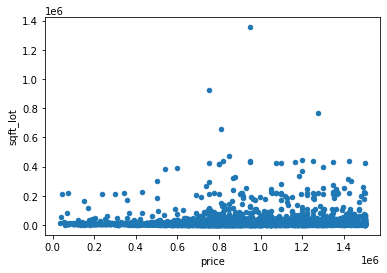

In [32]:
final_kc_df.plot(x='price', y='sqft_lot', kind='scatter');

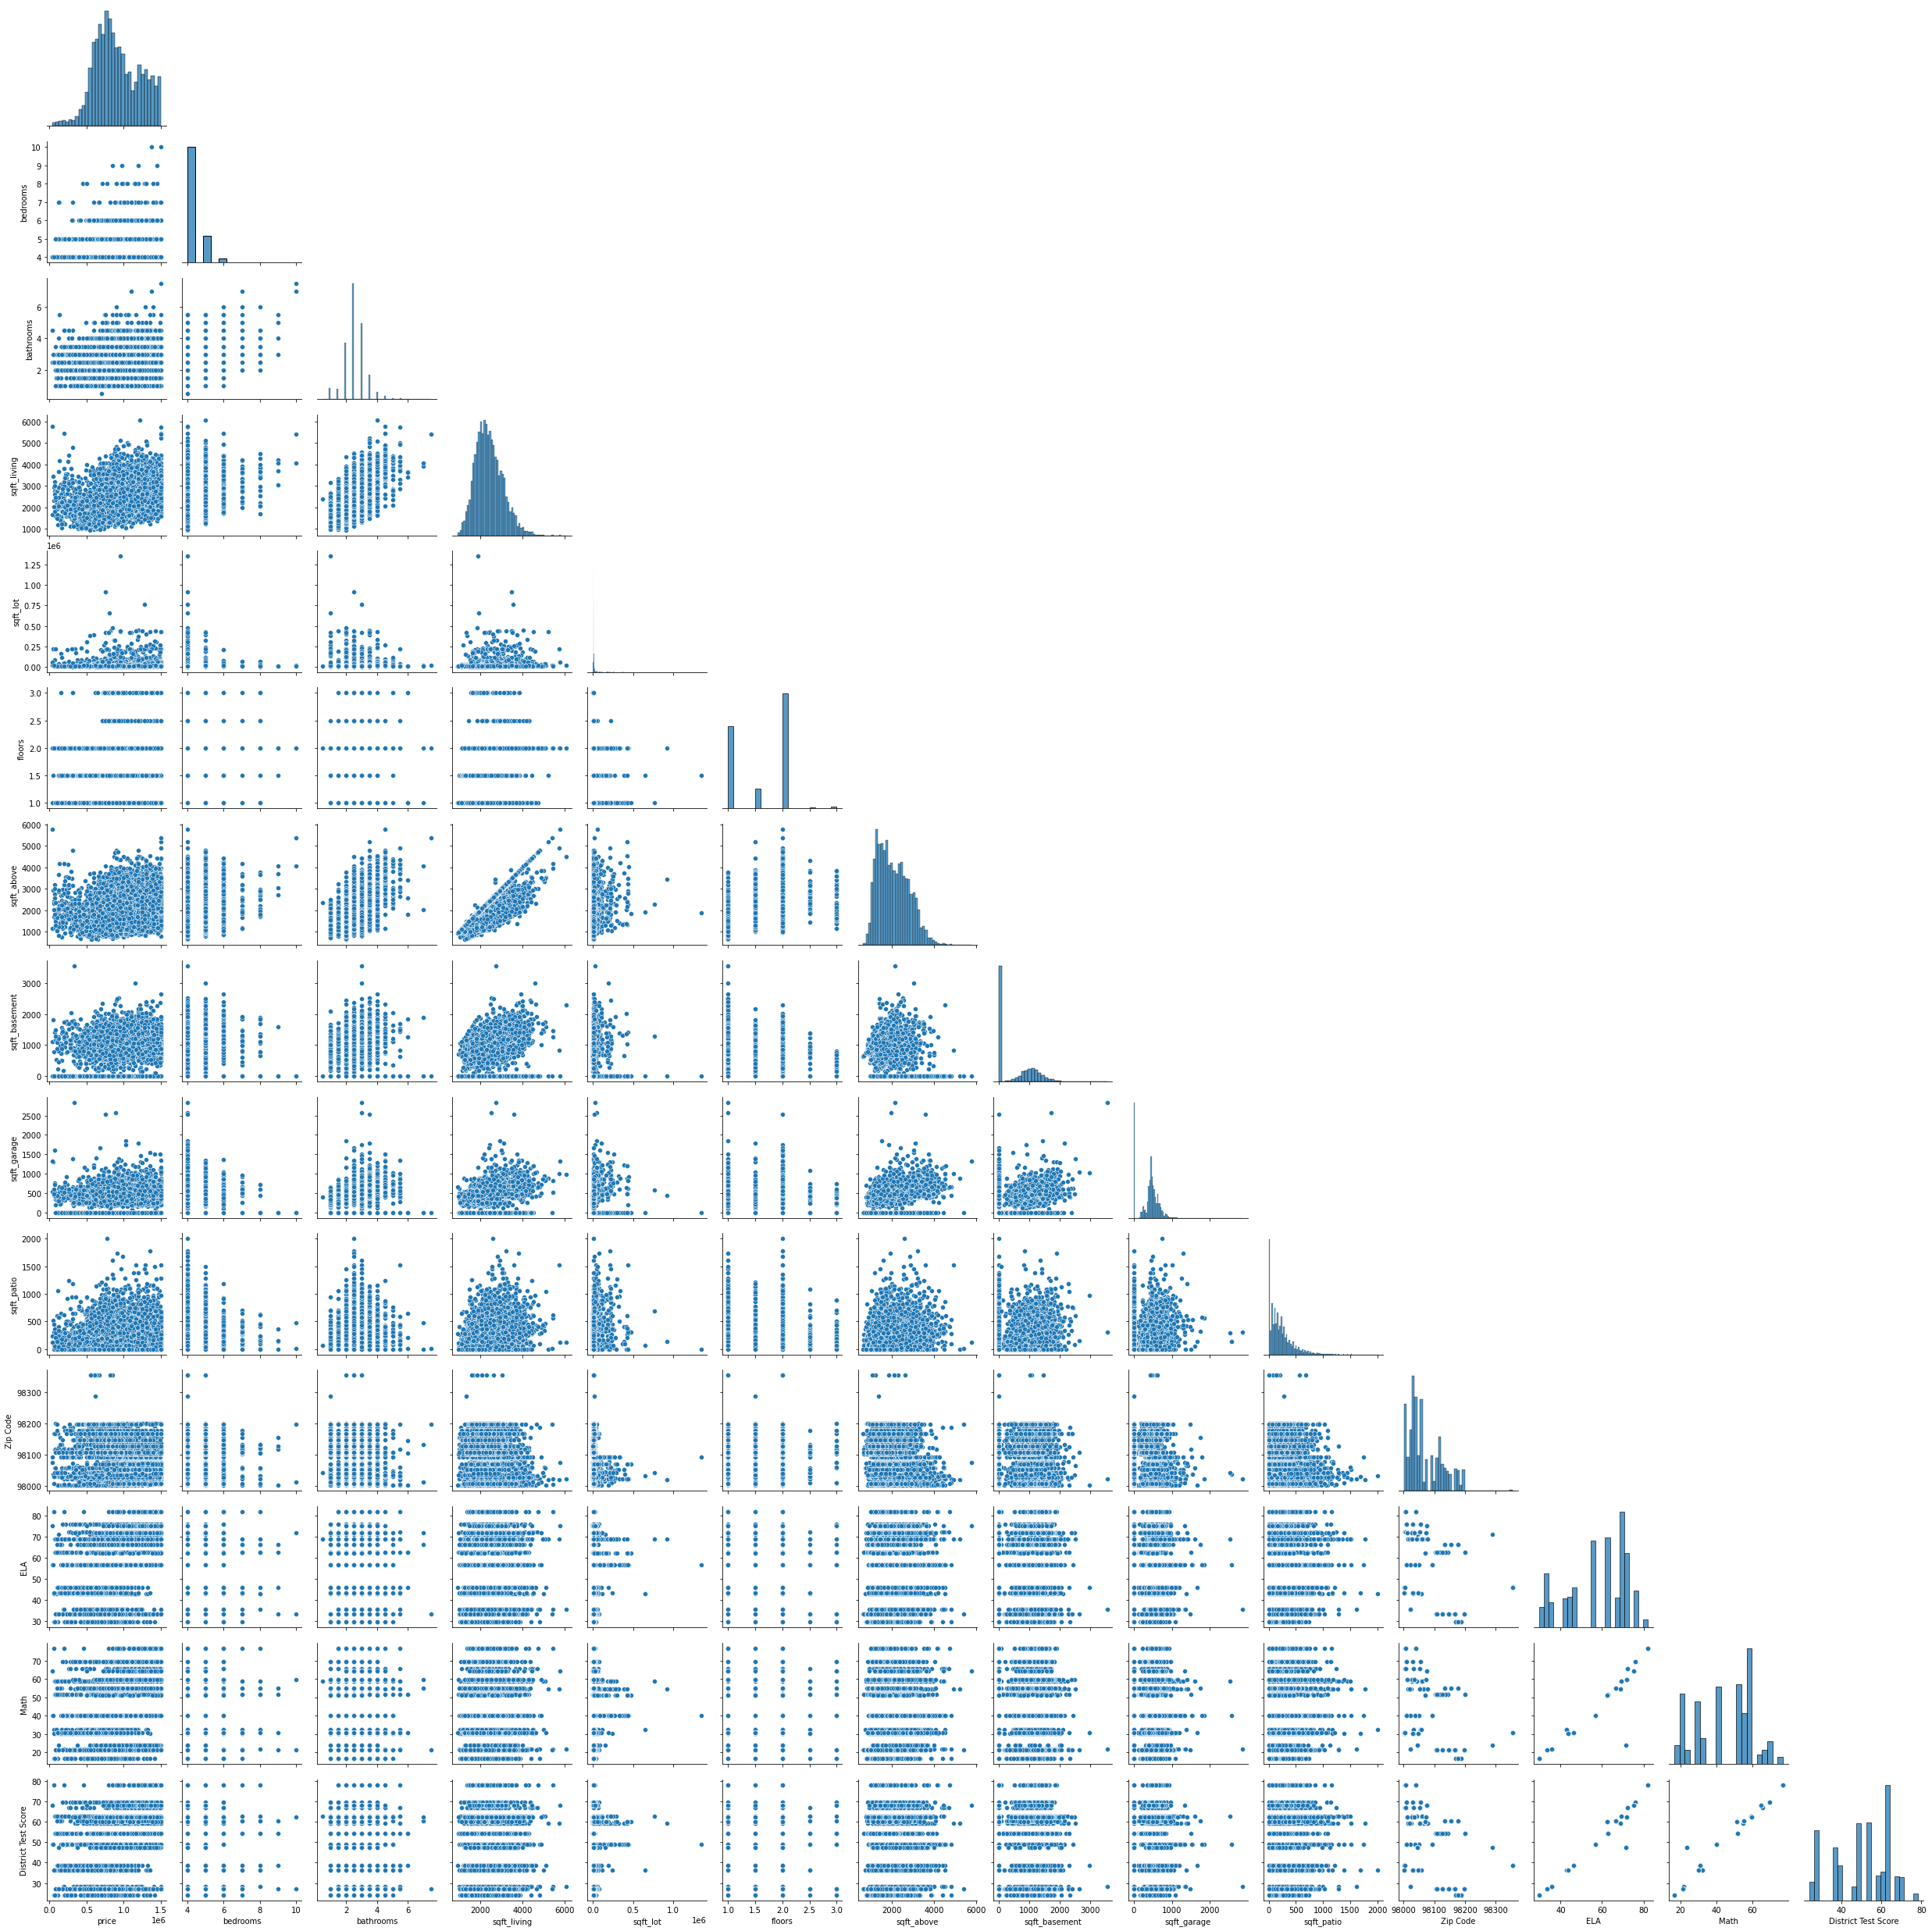

In [33]:
sns.pairplot(final_kc_df , corner = True)

<AxesSubplot:>

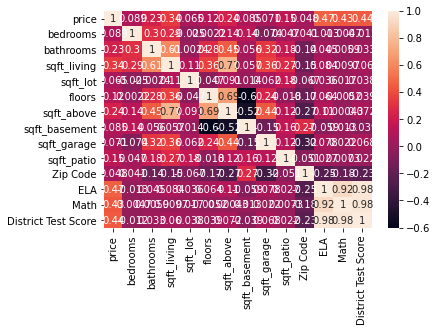

In [34]:
sns.heatmap(final_kc_df.corr(), annot = True)

### Dropping sqft_above as it is too closely correlated to sqft_living

In [35]:
final_kc_df = final_kc_df.drop(['sqft_above'], axis = 1)

### Creating a smaller dataset to work with

### Baseline Model....s

In [36]:
# Using price and sq ft of the living space, as it was the closest correlated numerical value
y = final_kc_df['price']
X_baseline = final_kc_df[['sqft_living']]

In [37]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     992.0
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          1.14e-204
Time:                        15:26:03   Log-Likelihood:            -1.0537e+05
No. Observations:                7545   AIC:                         2.107e+05
Df Residuals:                    7543   BIC:                         2.108e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.223e+05   1.25e+04     41.660      

In [38]:
# Transformed DistrictName to a numerical data so that we could comoare the correlation to price
y = final_kc_df['price']
X = pd.get_dummies(final_kc_df['DistrictName'], drop_first = True)

In [39]:
baseline_model2 = sm.OLS(y, sm.add_constant(X))
baseline_results2 = baseline_model2.fit()

print(baseline_results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     235.6
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:26:03   Log-Likelihood:            -1.0423e+05
No. Observations:                7545   AIC:                         2.085e+05
Df Residuals:                    7527   BIC:                         2.086e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [40]:
# That didn't go well, so now we're going to try condition
y = final_kc_df['price']
X_cond = final_kc_df[['District Test Score']]

In [41]:
baseline_model3 = sm.OLS(y, sm.add_constant(X_cond))
baseline_results3 = baseline_model3.fit()

print(baseline_results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1855.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:26:04   Log-Likelihood:            -1.0501e+05
No. Observations:                7545   AIC:                         2.100e+05
Df Residuals:                    7543   BIC:                         2.100e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.243e+05   1

In [42]:
y = final_kc_df['price']
X_baseline2 = final_kc_df[['sqft_living', 'bathrooms']]

In [43]:
baseline_model4 = sm.OLS(y, sm.add_constant(X_baseline2))
baseline_results4 = baseline_model4.fit()

print(baseline_results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     500.1
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          1.10e-204
Time:                        15:26:04   Log-Likelihood:            -1.0537e+05
No. Observations:                7545   AIC:                         2.107e+05
Df Residuals:                    7542   BIC:                         2.108e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.043e+05   1.42e+04     35.585      

In [44]:
final_kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                7545 non-null   float64
 1   bedrooms             7545 non-null   int64  
 2   bathrooms            7545 non-null   float64
 3   sqft_living          7545 non-null   int64  
 4   sqft_lot             7545 non-null   int64  
 5   floors               7545 non-null   float64
 6   condition            7545 non-null   object 
 7   grade                7545 non-null   object 
 8   heat_source          7545 non-null   object 
 9   sewer_system         7545 non-null   object 
 10  sqft_basement        7545 non-null   int64  
 11  sqft_garage          7545 non-null   int64  
 12  sqft_patio           7545 non-null   int64  
 13  Zip Code             7545 non-null   int64  
 14  DistrictName         7545 non-null   object 
 15  ELA                  7545 non-null   f

In [45]:
#onehot_enc = OneHotEncoder(drop = 'first', sparse = False)

#nominal_cols = ['Zip Code', 'DistrictName']
#onehot_enc.fit_transform(X_train[nominal_cols])

#X_train_nom_trans = onehot_enc.fit_transform(X_train[nominal_cols])
#X_train_nom_trans.shape

#cols = onehot_enc.get_feature_names()

#X_train_nom = pd.DataFrame(X_train_nom_trans, columns = cols)
#X_train_nom.head()

#X_process_train = pd.concat([X_train_numeric, X_train_cat],axis = 1)

### EDA - visualizations, mapping out distributions of individual variable, VIF, correlations

In [46]:
# X = final_kc_df('price', axis = 1)
# # For each X, calculate VIF and save in dataframe
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns
# vif.sort_values('VIF Factor', ascending=False)

### Modeling
Prepare Data

In [47]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = final_kc_df.drop('price', axis=1)
y = final_kc_df['price']

### TRAIN/TEST SPLIT

In [48]:
#X = final_kc_df.drop(columns='price')
#y = final_kc_df['price']
#X_train, X_test, y_train, y_test = train_test_split(
 #   X, y, test_size=0.3, random_state=42)

In [49]:
from sklearn.model_selection import train_test_split

# Test/Train Split - Train 80% of Data, Test 20% of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Processing Data
Y target variable

In [50]:
#Train Data
y_train.shape

(6036,)

In [51]:
#Test Data
y_test.shape

(1509,)

In [52]:
#  0   price                7545 non-null   float64
#  1   bedrooms             7545 non-null   int64  
#  2   bathrooms            7545 non-null   float64
#  3   sqft_living          7545 non-null   int64  
#  4   sqft_lot             7545 non-null   int64  
#  5   floors               7545 non-null   float64
#  6   condition            7545 non-null   object 
#  7   grade                7545 non-null   object 
#  8   heat_source          7545 non-null   object 
#  9   sewer_system         7545 non-null   object 
#  10  sqft_basement        7545 non-null   int64  
#  11  sqft_garage          7545 non-null   int64  
#  12  sqft_patio           7545 non-null   int64  
#  13  Zip Code             7545 non-null   int64  
#  14  DistrictName         7545 non-null   object 
#  15  ELA                  7545 non-null   float64
#  16  Math                 7545 non-null   float64
#  17  District Test Score  7545 non-null   float64

### Separate Continuous X Predictive Variables

In [53]:
X_train_numeric = X_train[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_basement',\
                           'sqft_garage','sqft_patio','ELA','Math','Zip Code','District Test Score']]

In [54]:
#View Correlation between Independent Numeric Variables
X_train_numeric.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,ELA,Math,Zip Code,District Test Score
bedrooms,1.000000,0.287574,0.289964,-0.022129,-0.001577,0.145766,-0.077268,0.049754,-0.004689,0.003239,0.027874,-0.003519
bathrooms,0.287574,1.000000,0.605667,-0.012489,0.280741,0.058739,0.311968,0.173215,0.047834,0.008579,-0.134205,0.034599
sqft_living,0.289964,0.605667,1.000000,0.103518,0.358054,0.055648,0.347068,0.256723,0.095266,0.019054,-0.147075,0.069536
sqft_lot,-0.022129,-0.012489,0.103518,1.000000,-0.055731,0.012820,0.044178,0.177305,0.041172,0.023560,-0.064384,0.044609
floors,-0.001577,0.280741,0.358054,-0.055731,1.000000,-0.605222,0.231631,-0.019656,0.060208,-0.009510,-0.158480,0.034081
sqft_basement,0.145766,0.058739,0.055648,0.012820,-0.605222,1.000000,-0.149099,0.158955,-0.047861,0.025437,0.266409,-0.026582
sqft_garage,-0.077268,0.311968,0.347068,0.044178,0.231631,-0.149099,1.000000,0.108483,0.085148,0.028573,-0.317434,0.074463
sqft_patio,0.049754,0.173215,0.256723,0.177305,-0.019656,0.158955,0.108483,1.000000,0.027298,0.010032,-0.046256,0.023954
ELA,-0.004689,0.047834,0.095266,0.041172,0.060208,-0.047861,0.085148,0.027298,1.000000,0.918154,-0.244797,0.978755
Math,0.003239,0.008579,0.019054,0.023560,-0.009510,0.025437,0.028573,0.010032,0.918154,1.000000,-0.174670,0.974587


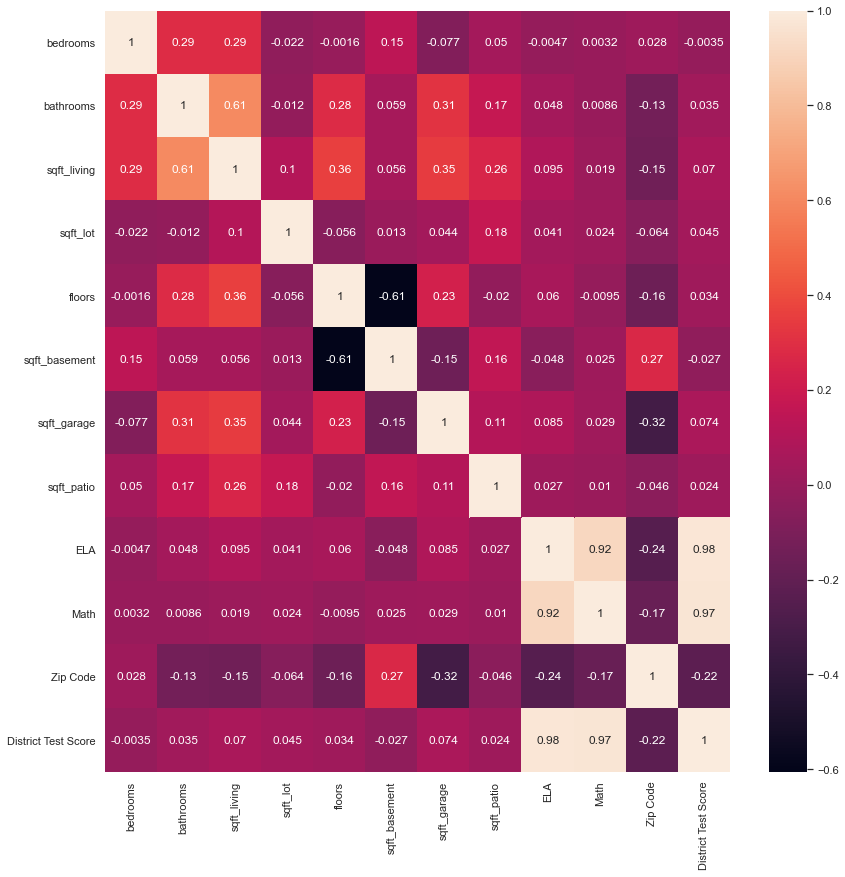

In [55]:
#Heatmap for Collinearity
sns.set(rc={'figure.figsize':(14, 14)})
sns.heatmap(X_train_numeric.corr(),annot=True);

#### TEST

In [56]:
X_test_numeric = X_test[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_basement',\
                           'sqft_garage','sqft_patio','ELA','Math','Zip Code','District Test Score']]

### Discrete X Predictive Variables
### TRAIN
Process Ordinal, Fit and transform, get names out into df

In [57]:
from sklearn.preprocessing import OrdinalEncoder

In [58]:
ord_cat_selector = ['condition', 'grade']
X_train_ord_cat_subset = X_train[ord_cat_selector]

In [59]:
X_train_ord_cat_subset['condition'].unique()

array(['Average', 'Very Good', 'Good'], dtype=object)

In [60]:
X_train_ord_cat_subset['grade'].unique()

array(['8 Good', '7 Average', '10 Very Good', '9 Better', '6 Low Average',
       '5 Fair', '11 Excellent', '13 Mansion'], dtype=object)

In [61]:
#X_train_ord_cat_subset['heat_source'].unique()

In [62]:
#X_train_ord_cat_subset['sewer_system'].unique()

In [63]:
#X_train_ord_cat_subset['DistrictName'].unique()

In [64]:
# REPLACE WITH COLUMN'S UNIQUE VALUES IN ASCENDING ORDER --->
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'] 
grade_list = ['3 Poor', '5 Fair', '6 Low Average', '7 Average','8 Good','9 Better','10 Very Good','11 Excellent',\
             '12 Luxury','13 Mansion']

In [65]:
o_enc = OrdinalEncoder(categories = [condition_list, grade_list])
o_enc.fit(X_train_ord_cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['3 Poor', '5 Fair', '6 Low Average', '7 Average',
                            '8 Good', '9 Better', '10 Very Good',
                            '11 Excellent', '12 Luxury', '13 Mansion']])

In [66]:
o_enc.transform(X_train_ord_cat_subset)

array([[2., 4.],
       [4., 3.],
       [3., 6.],
       ...,
       [2., 5.],
       [2., 4.],
       [2., 3.]])

In [67]:
X_train_ord = pd.DataFrame(o_enc.transform(X_train_ord_cat_subset),
                        columns = X_train_ord_cat_subset.columns)

In [68]:
X_train_ord.head()

,condition,grade
0,2.0,4.0
1,4.0,3.0
2,3.0,6.0
3,3.0,3.0
4,3.0,3.0


#### TEST

In [69]:
X_test_ord_cat_subset = X_test[ord_cat_selector]

In [70]:
X_test_ord = pd.DataFrame(o_enc.transform(X_test_ord_cat_subset),
                        columns = X_test_ord_cat_subset.columns)

### Discrete Nominal X Predictive Variables
### TRAIN
Process Nominal, Fit and transform, get names out into df

In [71]:
from sklearn.preprocessing import OneHotEncoder
onehot_enc = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [72]:
nominal_cols = ['heat_source', 'sewer_system', 'DistrictName']
onehot_enc.fit_transform(X_train[nominal_cols])

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [73]:
X_train_nom_trans = onehot_enc.fit_transform(X_train[nominal_cols])
X_train_nom_trans.shape

(6036, 28)

In [74]:
cols = onehot_enc.get_feature_names()

In [75]:
X_train_nom = pd.DataFrame(X_train_nom_trans, columns = cols)
X_train_nom.head()

,x0_Electricity,x0_Electricity/Solar,x0_Gas,x0_Gas/Solar,x0_Oil,x0_Oil/Solar,x0_Other,x1_PRIVATE,x1_PUBLIC,x1_PUBLIC RESTRICTED,...,x2_Northshore School District,x2_Renton School District,x2_Riverview School District,x2_Seattle School District No. 1,x2_Shoreline School District,x2_Skykomish School District,x2_Snoqualmie Valley School District,x2_Tahoma School District,x2_Tukwila School District,x2_Vashon Island School District
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### TEST

In [76]:
onehot_enc.transform(X_test[nominal_cols])
X_test_nom_trans = onehot_enc.transform(X_test[nominal_cols])
X_test_nom_trans.shape

(1509, 28)

In [77]:
X_test_nom = pd.DataFrame(X_test_nom_trans, columns = cols)

### Combine Discrete/Categorical X/ Predictive Variables

In [78]:
#combine all catergorical variables

X_train_cat_df = pd.concat([X_train_ord,X_train_nom],axis = 1)
X_train_cat_df

,condition,grade,x0_Electricity,x0_Electricity/Solar,x0_Gas,x0_Gas/Solar,x0_Oil,x0_Oil/Solar,x0_Other,x1_PRIVATE,...,x2_Northshore School District,x2_Renton School District,x2_Riverview School District,x2_Seattle School District No. 1,x2_Shoreline School District,x2_Skykomish School District,x2_Snoqualmie Valley School District,x2_Tahoma School District,x2_Tukwila School District,x2_Vashon Island School District
0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6031,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6032,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6033,2.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6034,2.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### TEST

In [79]:
X_test_cat_df = pd.concat([X_test_ord,X_test_nom],axis = 1)

### Combine Continuous and Discrete X/ Predictive Variables

In [80]:
#Train Data - Combine all processed X Variables
X_process_train = pd.concat([X_train_numeric.reset_index(),X_train_cat_df],axis = 1)

In [81]:
X_process_train.head()

,index,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,ELA,...,x2_Northshore School District,x2_Renton School District,x2_Riverview School District,x2_Seattle School District No. 1,x2_Shoreline School District,x2_Skykomish School District,x2_Snoqualmie Valley School District,x2_Tahoma School District,x2_Tukwila School District,x2_Vashon Island School District
0,1786,4,2.5,2370,4000,2.0,0,400,70,56.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4113,4,3.0,2360,9000,1.0,1460,560,370,66.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7488,5,3.5,3510,12729,2.0,0,480,680,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4207,4,2.5,2130,7000,2.0,950,520,470,33.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2833,5,3.0,3120,2963,2.0,1130,0,0,62.7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
X_process_train.shape

(6036, 43)

In [83]:
X_process_train.isnull().sum()

index                                   0
bedrooms                                0
bathrooms                               0
sqft_living                             0
sqft_lot                                0
floors                                  0
sqft_basement                           0
sqft_garage                             0
sqft_patio                              0
ELA                                     0
Math                                    0
Zip Code                                0
District Test Score                     0
condition                               0
grade                                   0
x0_Electricity                          0
x0_Electricity/Solar                    0
x0_Gas                                  0
x0_Gas/Solar                            0
x0_Oil                                  0
x0_Oil/Solar                            0
x0_Other                                0
x1_PRIVATE                              0
x1_PUBLIC                         

#### TEST 

In [84]:
X_process_test = pd.concat([X_test_numeric.reset_index(),X_test_cat_df],axis = 1)

#### Scale the Data

In [85]:
# Let's create (instantiate) a StandardScaler object to scale our data for us.
from sklearn.preprocessing import StandardScaler

In [86]:
# Now we'll apply it to our data by using the .fit() (calculates stds and means) and .transform() methods.
ss = StandardScaler()
#Train Data
ss.fit(X_process_train)
X_standard_process_train = ss.transform(X_process_train)

#Test Data
#X_standard_process_test = ss.transform(X_process_test)

In [87]:
pd.DataFrame(X_standard_process_train, columns = X_process_train.columns).isna().sum()

index                                   0
bedrooms                                0
bathrooms                               0
sqft_living                             0
sqft_lot                                0
floors                                  0
sqft_basement                           0
sqft_garage                             0
sqft_patio                              0
ELA                                     0
Math                                    0
Zip Code                                0
District Test Score                     0
condition                               0
grade                                   0
x0_Electricity                          0
x0_Electricity/Solar                    0
x0_Gas                                  0
x0_Gas/Solar                            0
x0_Oil                                  0
x0_Oil/Solar                            0
x0_Other                                0
x1_PRIVATE                              0
x1_PUBLIC                         

#### Creating, Fitting, and Running the Model

In [88]:
# Instantiate model
lr_simple_model = LinearRegression()

# Fit model
result = lr_simple_model.fit(X_standard_process_train, y_train)

In [89]:
# Retrieve estimated slope coefficient
result.coef_

array([-4.51848232e+03, -3.53875371e+03,  1.03393803e+04,  6.75126371e+04,
        6.63164917e+03,  1.28812251e+04, -8.31556980e+03, -2.31958664e+03,
        1.11033099e+04, -2.57902608e+17,  1.37905278e+18, -1.65493089e+04,
        8.24553293e+17,  3.58489021e+04,  6.90033880e+04,  5.38214316e+17,
        7.48397451e+16,  6.42387158e+17,  6.00301954e+16,  4.08652941e+17,
        2.00233410e+16,  3.46756968e+16,  4.27815355e+18,  4.28085667e+18,
        1.73153112e+17,  5.87493018e+17, -2.63874910e+17,  4.69032473e+17,
        7.53295794e+17,  6.29809068e+17,  1.08303596e+18, -4.01590848e+17,
       -3.49424551e+17, -2.11337719e+17,  5.22764002e+17, -5.93613978e+16,
        5.69519540e+16, -9.48003804e+16,  5.01835814e+17, -2.09482082e+17,
       -2.97193539e+17,  7.65766964e+17, -1.00270228e+16])

In [90]:
# Retrieve estimated y-intercept coefficient
result.intercept_

904845.8441532352

In [91]:
#GIVES US OUR R**2
lr_simple_model.score(X_standard_process_train, y_train)

0.5279935871730672

#### TEST

In [92]:
X_standard_process_test = ss.transform(X_process_test)

In [93]:
lr_simple_model.score(X_standard_process_test, y_test)

0.5264304193705696

In [94]:
#These are our predictions - USE TEST DATA
y_hat = lr_simple_model.predict(X_standard_process_test)
y_hat

array([625484.46915324, 616636.46915324, 972828.46915324, ...,
       670796.46915324, 522188.46915324, 847564.46915324])

In [95]:
print("Final Model Train:" , lr_simple_model.score(X_standard_process_train, y_train))
print("Final Model Test:" , lr_simple_model.score(X_standard_process_test, y_test))

Final Model Train: 0.5279935871730672
Final Model Test: 0.5264304193705696


#### Evaluate Final Model Performance
Observing Residuals

In [97]:
y_hat = lr_simple_model.predict(X_standard_process_test)
resid = (y_train - y_hat)

fig, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1);

ValueError: operands could not be broadcast together with shapes (6036,) (1509,) 

    ### Toying with another csv we made...

In [ ]:
final_house_df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_2/Phase2_Final_Proj/house_kc.csv')
final_house_df

In [ ]:
final_house_df.info()

In [ ]:
final_house_df.describe()

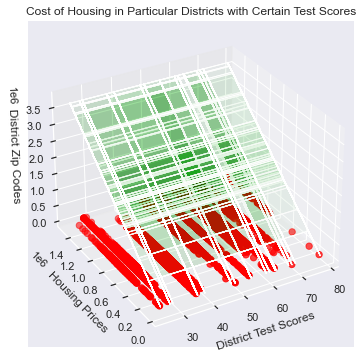

In [102]:
ax = plt.figure(figsize=(8, 6)).add_subplot(111, projection='3d')
ax.scatter(final_kc_df['District Test Score'], final_kc_df['price'], final_kc_df['Zip Code'],
           depthshade=True, s=40, color='#ff0000')
# create x,y
xx, yy = np.meshgrid(final_kc_df['District Test Score'], final_kc_df['price'])

# calculate corresponding z
z = 4.3825 * xx + 2.4693 * yy - 255.5434

# plot the surface
ax.plot_surface(xx, yy, z, alpha=0.01, color='#00ff00')

ax.view_init(30, azim=240)
ax.set_xlabel('District Test Scores')
ax.set_ylabel('Housing Prices')
ax.set_zlabel('District Zip Codes')
plt.title('Cost of Housing in Particular Districts with Certain Test Scores');

In [ ]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    third_results,
    exog_idx=list(X_all.columns.values),
    grid=(2,4),
    fig=fig)
plt.show()

In [104]:
sns.boxplot(x="DistrictName", y="District Test Score", hue="smoker", data=final_kc_df, palette="Set3")
#Adding the aesthetics
plt.title('Test Scores per District')
plt.xlabel('Districts')
plt.ylabel('Average Test Scores') 
# Show the plot
plt.show()

ValueError: Could not interpret input 'smoker'